# Data Preprocessing Assignment - Anurag Jawalkar_21BCE0369

### Import the Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [10]:
df = pd.read_csv("D:\\Courses\\AIML\\Data Sets\\Titanic-Dataset.csv")

### Checking for Null Values

In [11]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Data Visualization

<Axes: xlabel='Age', ylabel='Fare'>

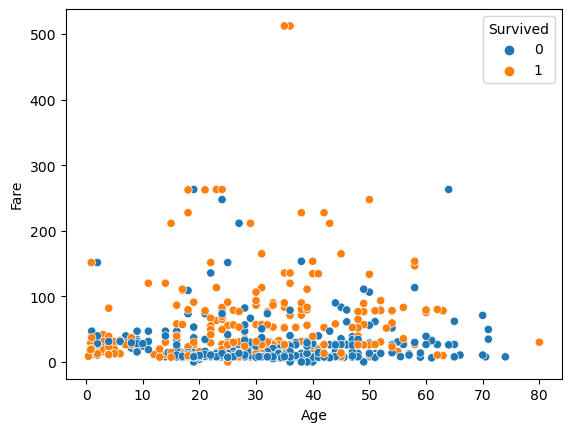

In [12]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived")

<Axes: xlabel='Age', ylabel='Fare'>

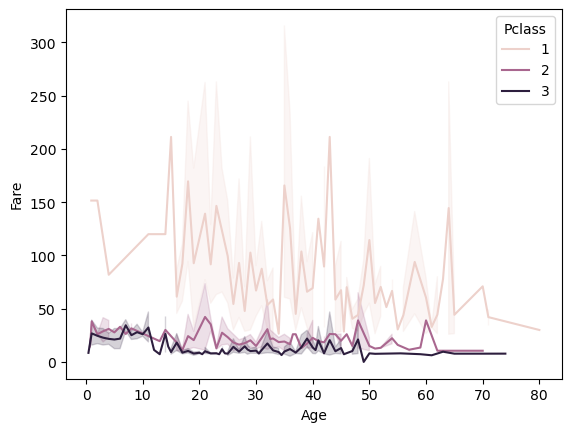

In [13]:
sns.lineplot(data=df, x="Age", y="Fare", hue="Pclass")

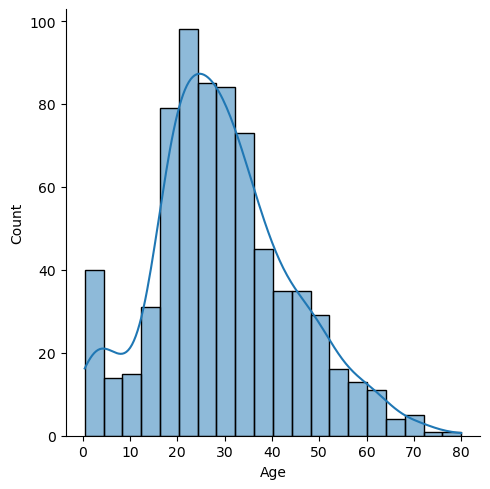

In [15]:
sns.displot(df["Age"].dropna(), bins=20, kde=True)

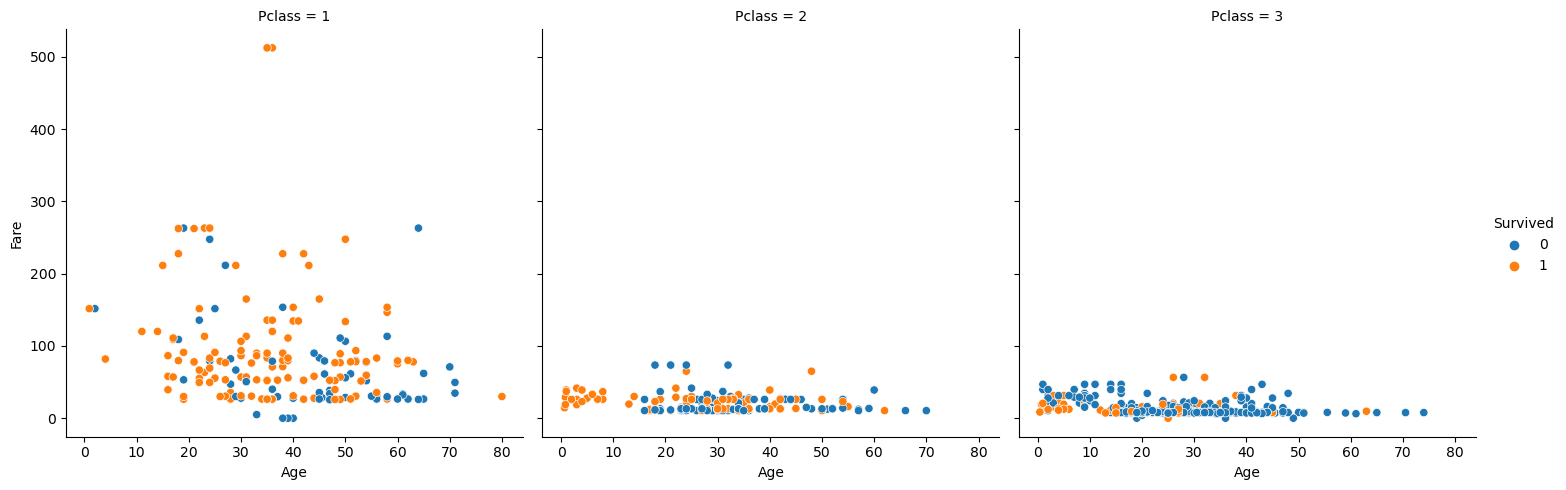

In [16]:
sns.relplot(data=df, x="Age", y="Fare", hue="Survived", col="Pclass", kind="scatter")

<Axes: xlabel='Pclass', ylabel='Fare'>

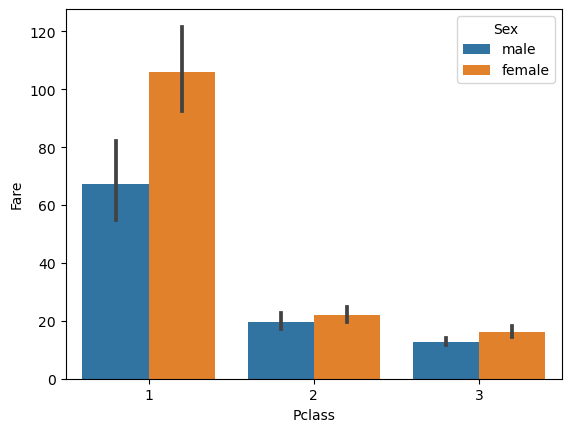

In [17]:
sns.barplot(data=df, x="Pclass", y="Fare", hue="Sex")

<Axes: xlabel='Embarked', ylabel='count'>

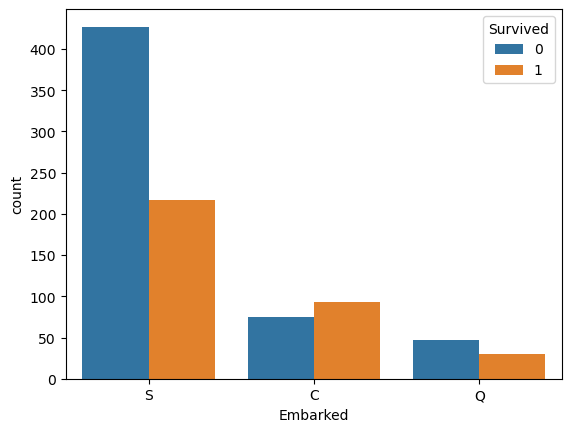

In [18]:
sns.countplot(data=df, x="Embarked", hue="Survived")


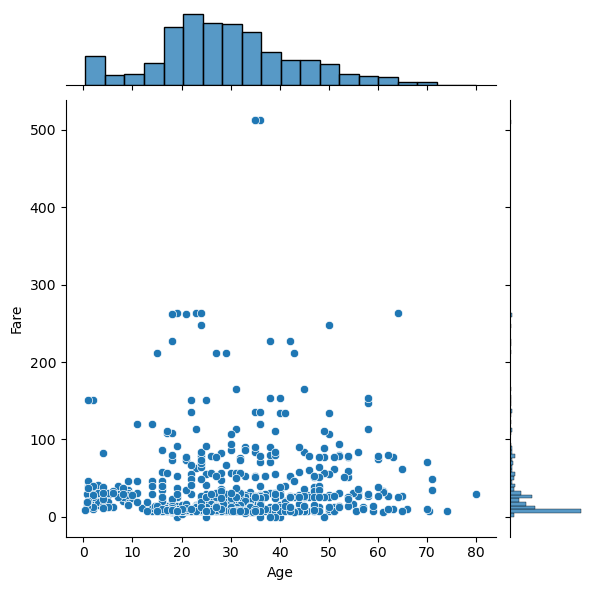

In [19]:
sns.jointplot(data=df, x="Age", y="Fare", kind="scatter")

<Axes: xlabel='Pclass', ylabel='Age'>

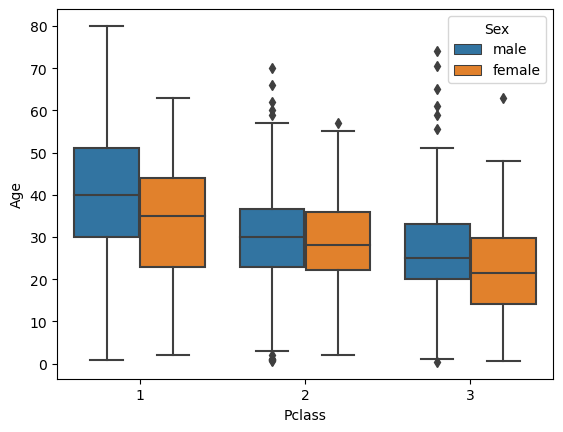

In [20]:
sns.boxplot(data=df, x="Pclass", y="Age", hue="Sex")

### Outlier Detection

In [24]:
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
fare_outliers = df[(df['Fare'] < lower_bound_fare) | (df['Fare'] > upper_bound_fare)]
age_outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]

### Splitting Dependent and Independent variables

In [25]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

### Perform Encoding

In [26]:
X = pd.get_dummies(X, columns=["Sex", "Embarked"], drop_first=True)

### Feature Scaling

In [27]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

### Splitting Data into Train and Test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Printing the new data frame

In [29]:
print("Fare Outliers:")
print(fare_outliers)
print("\nAge Outliers:")
print(age_outliers)

Fare Outliers:
     PassengerId  Survived  Pclass  \
1              2         1       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
61            62         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex        Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.699118   
34                             Meyer, Mr. Edgar Joseph    male  28.000000   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.000000   
61                                 Icard, Miss. Amelie  female  38.000000   
..                                                 ...     ...    

# Thank You!